# Data Preparation

Part 1 : DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Changing working directory
import os

In [3]:
os.getcwd()

'C:\\Users\\dell\\Desktop\\Python_code_udemy\\Medical Cancer Classification Kettering Kaggle'

In [4]:
os.chdir("C:/Users/dell/Desktop/Python_code_udemy/Teclov_data_code_project_forudemy")

In [5]:
# Reading dataset

rounds = pd.read_csv("rounds2.csv", encoding="ISO-8859-1")
companies = pd.read_csv("companies.txt", sep = "\t", encoding="ISO-8859-1")

In [6]:
# Checking the imported dataset
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [8]:
#Inspect the structure

rounds.info()
rounds.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


(114949, 6)

In [9]:
companies.info()
companies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


(66368, 10)

In [10]:
#identify the unique number permalinks in companies

len(companies.permalink.unique())

66368

In [11]:
# Convert permalink to lower case

companies['permalink'] = companies['permalink'].str.lower()
companies.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [12]:
#Check unique values again

len(companies.permalink.unique())

66368

In [13]:
# Check unique values in company_permalink in rounds data

len(rounds.company_permalink.unique())

90247

In [14]:
# We expect the number of companies to be same. However since there is a mismatch, let's convert the company_permalink to lower case

rounds['company_permalink'] = rounds['company_permalink'].str.lower()

In [15]:
# Now check the unique values

len(rounds.company_permalink.unique())

66370

In [16]:
# We have 2 more companies than the companies dataset which has 66368.
# Lets explore further and check those 2 companies 

rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [17]:
# All the above permalinks have weird non-English charaacters . We need to check if they were presetn in the original imported file as well.

rounds = pd.read_csv("rounds2.csv", encoding="ISO-8859-1")
rounds.loc[[29597, 31863, 45176, 58473, 101036, 109969, 113839]]


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [18]:
#As seen they were present in the imported file. Lets check if the same thing is present in the actual csv file as well
# Since thats not the case, we can confirm that these characters were brought by pandas due to incorrect encoding
#Lets find out the encoding of this file

import chardet

rawdata = open("rounds2.csv", 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(result)
print(charenc)

{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}
Windows-1254


In [19]:
# Apparently pandas cannot decode "cp-1254" in this case. So we finally have to do this part

rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
13,/ORGANIZATION/1,/funding-round/03b975068632eba5bfdb937ec8c07a68,seed,NaN,05-02-2014,150000.0
15,/ORGANIZATION/1,/funding-round/e82464f22241715dd1a6c77241055ed1,seed,NaN,20-07-2011,1000050.0
17,/ORGANIZATION/1-4-ALL,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN
19,/ORGANIZATION/1-800-DENTIST,/funding-round/5274aacc211163fc7c86539ce94bbacc,undisclosed,NaN,19-08-2010,NaN


In [20]:
# We expect the number of companies to be same. However since there is a mismatch, let's convert the company_permalink to lower case

rounds['company_permalink'] = rounds['company_permalink'].str.lower()

In [21]:
# lets look at the unique number of values again

len(rounds['company_permalink'].unique())

66368

In [22]:
# Lets check the companies data also for such instances

companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
2556,/organization/allgã¤u-outlet,AllgÃ¤u Outlet,http://allgaeuoutlet.de/,Fashion,operating,DEU,2,DEU - Other,Sonthofen,NaN
4567,/organization/asiansbookâ¢,Asiansbookâ¢,http://www.asiansbook.com,Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,NaN
4903,/organization/atã¶lye-gri,AtÃ¶lye Gri,http://www.atolyegri.com/,Advertising,operating,NaN,NaN,NaN,NaN,NaN
5490,/organization/axã¨gaz,AxÃ¨gaz,http://www.axegaz.com/,Energy,operating,FRA,A8,Paris,Levallois-perret,01-01-2012
8131,/organization/borã©al-bikes-incorporated,BorÃ©al Bikes Incorporated,http://www.borealbikes.com,Automotive|Design|Manufacturing,operating,DEU,16,Berlin,Berlin,01-01-2014


In [23]:
# We found same instances of weird non-English characters and hence we will treat them as well

companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii', 'ignore')

In [24]:
# Check again

len(companies['permalink'].unique())

66368

In [25]:
#Lets write these clean dataframes to new files

rounds.to_csv('rounds_clean.csv', sep = ',', index= False)
companies.to_csv('companies_clean.csv', sep = '\t', index = False)

In [26]:
# Lets now read the decoded, files

rounds = pd.read_csv('rounds_clean.csv', encoding = 'ISO-8859-1')
companies = pd.read_csv('companies_clean.csv', sep = '\t', encoding = 'ISO-8859-1')

In [27]:
# Quickly verify if there are 66368 companies present in both the datasets

print(len(rounds['company_permalink'].unique()))
print(len(companies['permalink'].unique()))

66368
66368


## Missing Value Treatment

Lets check if there are missing values and if there, lets try to treat them

In [28]:
# Checking for any missing values in rounds dataframe

rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [29]:
# Checking for missing values in companies dataframe

companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [30]:
# Since there are no missing values in the company permalink and the permalink columns, lets merge the two dataframes into a master dataframe

master = pd.merge(companies, rounds, how= 'inner', left_on = 'permalink', right_on = 'company_permalink')
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [31]:
# Since the columns 'permalink' and 'company_permalink' are same ,lets drop one of them

master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [32]:
master = master.drop(['company_permalink'], axis = 1)

In [33]:
# Check the columns 

master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

In [34]:
#Checking for missing values columnwise in the master dataframe

master.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [35]:
# Lets calculate the missing percentage

round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [36]:
# Clearly we can see that 'funding_round_code' is useless for us since it contains more than 72% of missing values. Also as per 
# the business onjectives, columns 'homepage_url', 'country_code', 'state_code' 'region','city' are not important and need not 
#used. Hence we can drop them

master = master.drop(['funding_round_code','homepage_url', 'founded_at', 'state_code', 'region','city'], axis = 1)

In [37]:
master.head()


,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [38]:
# Now lets check the percentage of missing values

round(100*(master.isnull().sum()/len(master.index)),2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [39]:
# Now the columnn 'raised_amount_usd' is very uselfu for our business objective as that is the amount we want to analyze. So it 
# needs to be carefully treated.
#Also column 'country_code' will be required for country wise analysis and 'category_list' will be useful to merge the master 
#dataframe based on the categories that the companies would fall into

#Lets first analyze 'raised_amount_usd' column:

master['raised_amount_usd'].describe()


count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [40]:
# As we can there is a huge difference in the mean which is about 10 mn and the median which is only 1 mn. Since there is so much
# spread in the data it would be incorrect to impute it with a metric like mean or median. Hence it would be bes to drop those 
# observation completely since we do have a large number of observations in the dataset.

# So lets remove the rows containing the missing values for 'raised_amount_usd"

master = master[~np.isnan(master['raised_amount_usd'])]
round(100*(master.isnull().sum()/len(master.index)),2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [41]:
# Now lets look at the 'category_list' column. It is best to convert it to type 'category'

country_codes = master['country_code'].astype('category')
country_codes.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
FRA     1451
ISR     1364
ESP     1074
DEU     1042
AUS      649
RUS      588
IRL      563
SWE      560
SGP      546
NLD      532
JPN      485
ITA      483
BRA      483
CHE      437
KOR      432
CHL      432
FIN      382
DNK      314
ARG      297
BEL      293
HKG      250
TUR      196
NOR      191
BGR      190
MEX      189
       ...  
KHM        2
DOM        2
MAR        2
MAF        2
KWT        2
NIC        2
ZMB        2
KAZ        2
TUN        2
SOM        1
SYC        1
SEN        1
TGO        1
QAT        1
UZB        1
PSE        1
PRY        1
OMN        1
DMA        1
BLM        1
MNE        1
MKD        1
BRB        1
LAO        1
IRN        1
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

In [42]:
# Lets view it in fractions

round(100*(master['country_code'].value_counts()/len(master.index)),2)

USA    65.34
GBR     5.29
CAN     2.75
CHN     2.03
IND     1.74
FRA     1.53
ISR     1.44
ESP     1.13
DEU     1.10
AUS     0.68
RUS     0.62
IRL     0.59
SWE     0.59
SGP     0.57
NLD     0.56
JPN     0.51
ITA     0.51
BRA     0.51
CHE     0.46
KOR     0.45
CHL     0.45
FIN     0.40
DNK     0.33
ARG     0.31
BEL     0.31
HKG     0.26
TUR     0.21
NOR     0.20
BGR     0.20
MEX     0.20
       ...  
MCO     0.00
CIV     0.00
NIC     0.00
ZMB     0.00
KHM     0.00
TUN     0.00
BAH     0.00
MAR     0.00
KAZ     0.00
PRY     0.00
TGO     0.00
GGY     0.00
BLM     0.00
SEN     0.00
DMA     0.00
SYC     0.00
LAO     0.00
UZB     0.00
PSE     0.00
QAT     0.00
DZA     0.00
IRN     0.00
SOM     0.00
MKD     0.00
HND     0.00
GRD     0.00
MNE     0.00
BRB     0.00
KNA     0.00
OMN     0.00
Name: country_code, Length: 134, dtype: float64

In [43]:
# By this we can see most number of investments happened in USA. 
# Now we can either remove the missing data in 'country_code' or impute it by the mode which is 'USA'. Since the number of missing
#observations are low(6%), we can afford to remove them as we have a large number of observations as well.

master = master[~pd.isnull(master['country_code'])]

# lets look at missing values as well

round(100*(master.isnull().sum()/len(master.index)),2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [44]:
# Now there is only a fraction of missing values (0.65%) in the master dataframe. We can simply either choose to leave them or 
# remove them. We are doing this rather than leaving them untocuhed, since this column would be used to merge with the "main_categories'
# hence it is necessary that we remove them

master = master[~pd.isnull(master['category_list'])]

# Check for missing values one last time

round(100*(master.isnull().sum()/len(master.index)),2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [45]:
# So we have successfully cleaned the data from missing values.
# Lets write the cleaned datdframe to a new file 'master

master.to_csv('master_df.csv', sep = ',', index = False)

In [46]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
permalink                  88529 non-null object
name                       88528 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [47]:
# Lets look at how much observations are retained after the missing value analysis

100*(len(master.index)/len(rounds.index))

77.01589400516751

In [48]:
# This shows that we have retained about 77% of the data

## Part 3 :  Analysis

### Funding Type Analysis

In [49]:
# Lets read the master data file

df = pd.read_csv('master_df.csv', sep =',', encoding = 'ISO-8859-1')

In [50]:
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [51]:
# Lets filter the df so that it contains the funding round type as desired by our business objective

df = df[(df.funding_round_type == 'venture') |
        (df.funding_round_type == 'angel') |
       (df.funding_round_type == 'seed') |
       (df.funding_round_type == 'private_equity')]

In [52]:
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0


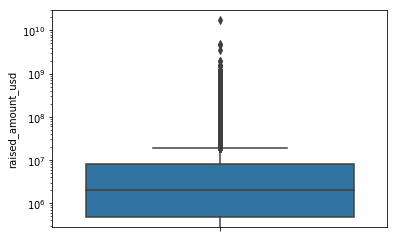

In [53]:
# Now we need to compute the representative vlaue amount for each funding_round_type. We can either choose mean or median- let's look
# the distribution of the 'raised_amount_usd' to get a sense of the distribution

sns.boxplot(y= df['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [54]:
# Lets check the summary 

df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

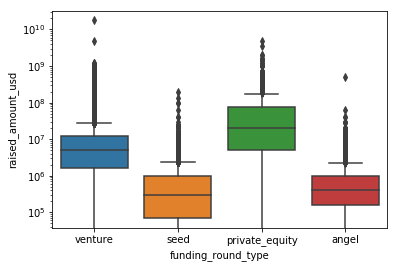

In [55]:
# We can see there is a significant difference between the mean (9.5m) and the median(2m). Lets compare these stats across the
# funding types to see their distribution

sns.boxplot(x = df['funding_round_type'],
           y= df['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [56]:
# Lets compare the mean and median across the four categories

df.pivot_table(values = 'raised_amount_usd', columns = 'funding_round_type', aggfunc = [np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

In [57]:
# As we can see there is a large difference and spread between the median and mean values. Since we are looking to pick for the 
# summary a representative metric, it is best to go with median since it is not affected as much as the mean which looking at the 
# few extreme values can get pulled towards them.

# Compare the median investment across funding types

df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

As we can see the median investment for 'private_equity' type is 20m which is beyond the range of the company's budget. Hence
we can infer that 'venture' type is best suited for the company to invest as its median value is 5m which falls within the scope
of our company's budget



## Country Analysis

Now lets compare the total investment across different countries. Now we would also filter the data to include only the required 'venture' type and then compare it across different countries

In [58]:
df = df[df.funding_round_type == 'venture']

In [59]:
# Now comparing it across different countries

countrywise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(countrywise_total)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
SWE    3.145857e+09
NLD    2.903876e+09
CHE    2.801560e+09
SGP    2.793918e+09
ESP    1.827622e+09
BRA    1.785818e+09
IRL    1.669286e+09
RUS    1.570426e+09
AUS    1.319029e+09
DNK    1.228311e+09
FIN    1.043200e+09
BEL    1.030840e+09
NOR    9.536361e+08
KOR    8.919883e+08
MYS    8.830588e+08
HKG    7.812670e+08
TWN    6.239795e+08
AUT    5.833607e+08
TUR    5.590975e+08
ITA    4.882894e+08
NZL    4.483164e+08
           ...     
KWT    1.400000e+07
LIE    1.309172e+07
MNE    1.220000e+07
SVN    1.201751e+07
BGR    1.130000e+07
KAZ    1.100000e+07
GRC    1.074378e+07
BAH    8.900000e+06
TTO    8.500000e+06
SVK    8.241062e+06
BGD    7.002000e+06
LBN    6.455000e+06
GGY    3.960000e+06
TUN    3.920000e+06
SEN    2.860000e+06
HRV    2.633669e+06
UGA    2.500000e+06
PER    2.469270e+06
BWA    

In [60]:
# Now lets select the top 9 countries out of this list

top9 = countrywise_total[:9]
print(top9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64


In [61]:
# Among the top 9 countries, the top 3 English speaking countries are USA, GBR, IND. Lets filter the dataframe to contain only
# these top 3 English speaking countries

df = df[(df.country_code == 'USA') |
       (df.country_code == 'GBR') |
       (df.country_code == 'IND')]

In [62]:
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


In [63]:
# After filterin as per our business objective of 'venture' type investments and the top 3 countries, our df looks like this

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88518
Data columns (total 9 columns):
permalink                  38803 non-null object
name                       38803 non-null object
category_list              38803 non-null object
status                     38803 non-null object
country_code               38803 non-null object
funding_round_permalink    38803 non-null object
funding_round_type         38803 non-null object
funded_at                  38803 non-null object
raised_amount_usd          38803 non-null float64
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


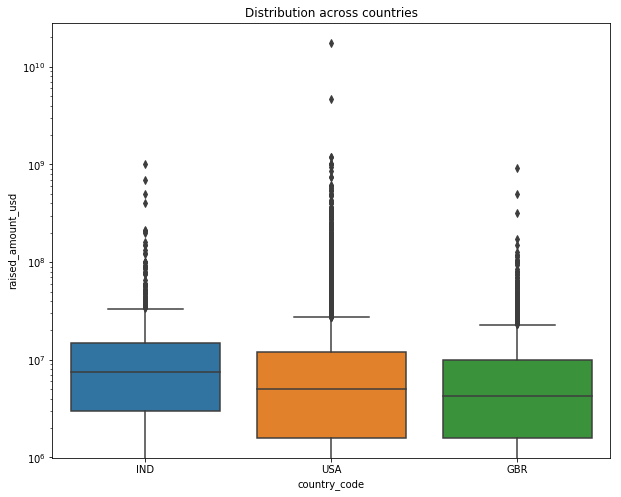

In [64]:
# Now lets visually analyze the distribution of funding amount across the countries
plt.figure(figsize = (10,8))
sns.boxplot( x = 'country_code',
           y = 'raised_amount_usd', data = df)
plt.title('Distribution across countries')
plt.yscale('log')
plt.show()

In [65]:
# We ahve now choosen the 'venture' investment type and filtered out the 3 countries. Now lets choose the sectors


Sector ANalysis

In [66]:
# We need to extract the main cateogry from the category_list cloumns since it contains an elongated version of which we would 
# need only the first word such as e.g from 'Apps|Cable|Distribution|Software' we need only the first main category 'Apps'

df.loc[:, 'main_category'] = df['category_list'].apply(lambda x : x.split('|')[0])
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


In [67]:
# We can now drop the 'category_list'columns

df = df.drop(['category_list'], axis = 1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


In [68]:
# Lets read the mapping file 

mapping = pd.read_csv('mapping.csv', sep = ',', encoding = 'ISO-8859-1')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [69]:
# Lets check for missing values in mapping

mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [70]:
# Lets remove the missing value(1) from this 

mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [71]:
# Lets convert the column = 'category_list' from both the df and mapping dataframes so that we can later merge them.

mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()

mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [72]:
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,apps


In [73]:
mapping['category_list']

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                    alter0tive medicine
21                                 alumni
22                               a0lytics
23                                android
24                                

In [74]:
# In order to merge both the dataframes, the category_list columns should have equal number of unique values. Lets check if all
# values in main_category are present in 'category_list' column of 'mapping' file

df[~(df.main_category).isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
137,/organization/1world-online,1World Online,operating,USA,/funding-round/4e30bd5c85d8163239a3479ec979647a,venture,01-12-2013,500000.0,analytics
138,/organization/1world-online,1World Online,operating,USA,/funding-round/a349bfd7a8d48cfc8b9fdb79480dea7f,venture,02-07-2013,1000000.0,analytics
187,/organization/24-7-card,24/7 Card,closed,USA,/funding-round/0c38194ff2035185c96155dfad18f3bd,venture,21-12-2011,3452941.0,finance
590,/organization/6th-wave-innovations-corporation,6th Wave Innovations Corporation,operating,USA,/funding-round/75d128ac40f9e541a1a11786a47c2952,venture,08-07-2015,2569720.0,nanotechnology
597,/organization/7-billion-people,7 Billion People,closed,USA,/funding-round/58959ed2be7b14abd6beeb20c9eb17ca,venture,13-07-2012,2368902.0,analytics


In [75]:
# Lets also look at the values that are present in the mapping category_list column and not in df main_category column

mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


In [76]:
# Carefully inspecting we can see that some values have 0 in them, Seems to be like someone unknowingly replaced the 'na' with '0'
# This does not seem to be a random quality issue

# Lets treat this by replacing '0' with 'na'

mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'NA'))

In [77]:
mapping['category_list']

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                   alterNAtive medicine
21                                 alumni
22                              aNAlytics
23                                android
24                                

In [78]:
# Now since everything looks good and clean. lets merge the dataframes

df = pd.merge(df, mapping, how='inner', left_on = 'main_category',  right_on = 'category_list')
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,0,0,0,1,0,0,0,0,0


In [79]:
# Lets drop the 'main_Category' column since it is same as 'category_list'

df = df.drop(['main_category'], axis = 1)

In [80]:
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,0,0,0,1,0,0,0,0,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36183 entries, 0 to 36182
Data columns (total 18 columns):
permalink                                  36183 non-null object
name                                       36183 non-null object
status                                     36183 non-null object
country_code                               36183 non-null object
funding_round_permalink                    36183 non-null object
funding_round_type                         36183 non-null object
funded_at                                  36183 non-null object
raised_amount_usd                          36183 non-null float64
category_list                              36183 non-null object
Automotive & Sports                        36183 non-null int64
Blanks                                     36183 non-null int64
Cleantech / Semiconductors                 36183 non-null int64
Entertainment                              36183 non-null int64
Health                                     36183 

Converting the 'wide' dataframe to 'long'
You'll notice that the columns representing the main category in the mapping file are originally in the 'wide' format - Automotive & Sports, Cleantech / Semiconductors etc.

They contain the value '1' if the company belongs to that category, else 0. This is quite redundant. We can as well have a column named 'sub-category' having these values.

Let's convert the df into the long format from the current wide format. First, we'll store the 'value variables' (those which are to be melted) in an array. The rest will then be the 'index variables'.

In [82]:
# Lets store the values variables and indesx variables

# Store value_vars in one series

value_vars = df.columns[9:18]

#Store index variable in another series

index_vars = np.setdiff1d( df.columns , value_vars)

print(value_vars)
print(index_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')
['category_list' 'country_code' 'funded_at' 'funding_round_permalink'
 'funding_round_type' 'name' 'permalink' 'raised_amount_usd' 'status']


In [83]:
# Convert into long form

long_df = pd.melt(df, id_vars = list(index_vars),
                  value_vars = list(value_vars))

long_df.head()

,category_list,country_code,funded_at,funding_round_permalink,funding_round_type,name,permalink,raised_amount_usd,status,variable,value
0,media,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,#fame,/organization/-fame,10000000.0,operating,Automotive & Sports,0
1,media,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,90min,/organization/90min,15000000.0,operating,Automotive & Sports,0
2,media,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,90min,/organization/90min,5800000.0,operating,Automotive & Sports,0
3,media,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,90min,/organization/90min,18000000.0,operating,Automotive & Sports,0
4,media,USA,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,All Def Digital,/organization/all-def-digital,5000000.0,operating,Automotive & Sports,0


In [84]:
# We can now get rid of the common_value which have value 0 and then remove the column completely

long_df = long_df[long_df['value'] == 1]
long_df = long_df.drop('value', axis = 1)

In [85]:
long_df.head()
len(long_df)

36183

In [86]:
# Renaming the 'variable column

long_df = long_df.rename(columns = {'variable' : 'sector'})
long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36183 entries, 23933 to 325631
Data columns (total 10 columns):
category_list              36183 non-null object
country_code               36183 non-null object
funded_at                  36183 non-null object
funding_round_permalink    36183 non-null object
funding_round_type         36183 non-null object
name                       36183 non-null object
permalink                  36183 non-null object
raised_amount_usd          36183 non-null float64
status                     36183 non-null object
sector                     36183 non-null object
dtypes: float64(1), object(9)
memory usage: 3.0+ MB


In [89]:
# Lets compute sector wise number and sum of investments across three countries
# firsst lets filter for investment range between 5 m to 15 m

df = long_df[(long_df.raised_amount_usd >= 5000000) & (long_df.raised_amount_usd <= 15000000)]                            
                            

In [90]:
# lets now group by country code, sector and compute sum and count

df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 127  1.136905e+09
             Entertainment                               54  4.615111e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     143  1.249124e+09
             Social, Finance, Analytics, Advertising     98  8.218884e+08
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     109  1.007410e+09
             Social, Finance, Analytics, Advertising     32  2.905435e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2297  2.118100e+10
             Entertainment                              580  5.000213e+09
             Health                                     908  8.200859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1563  1.379682e+10
             Others                                    2923  2.608928e+10
             Social, Finance, Analytics, Advertising   1912  1.668070e+10

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


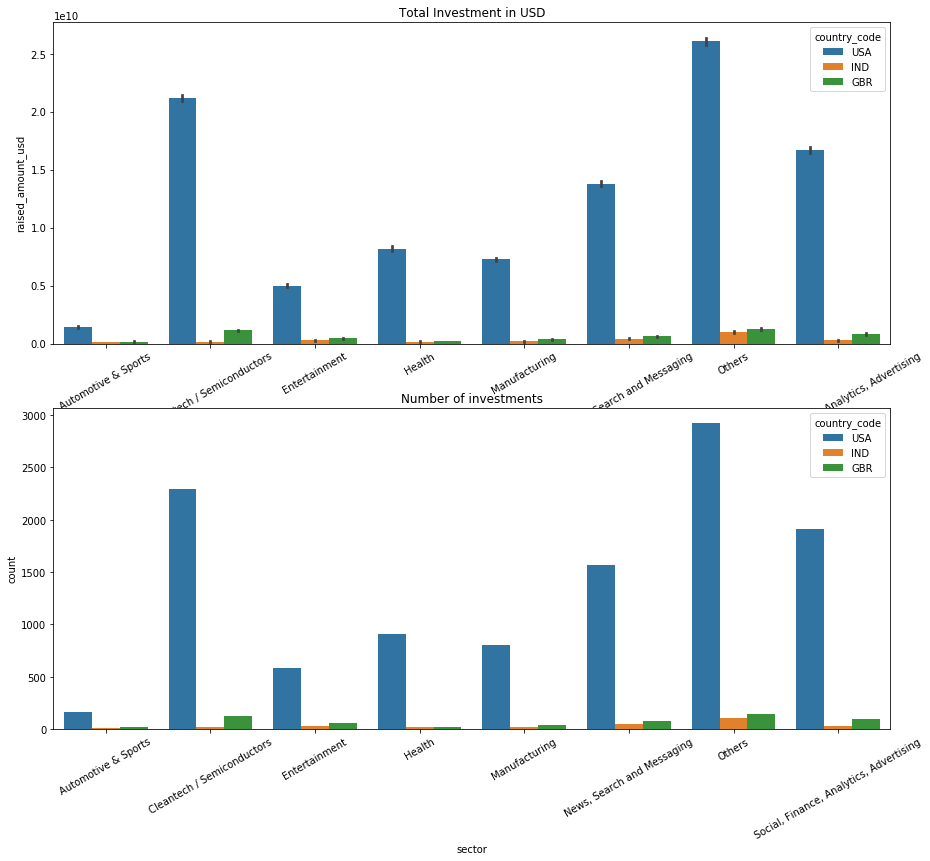

In [92]:
# Lets plot it to understand it better

plt.figure(figsize=(15,13))

plt.subplot(2,1,1)
p = sns.barplot(x = 'sector', y = 'raised_amount_usd', hue = 'country_code', data= df, estimator = np.sum)
p.set_xticklabels(p.get_xticklabels(), rotation = 30)
plt.title('Total Investment in USD')

plt.subplot(2,1,2)
q = sns.countplot(x = 'sector',hue = 'country_code', data= df)
q.set_xticklabels(q.get_xticklabels(), rotation = 30)
plt.title('Number of investments')

plt.show()

Thus, the top country in terms of the number of investments (and the total amount invested) is the USA. The sectors 'Others', 'Social, Finance, Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.

In case you don't want to consider 'Others' as a sector, 'News, Search and Messaging' is the next best sector.